In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the datasets
train_data_path = 'churn-bigml-80.csv'
test_data_path = 'churn-bigml-20.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Encode categorical features
label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Separate features and target variable
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"

    model_performance[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Hiển thị hiệu suất các mô hình
performance_df = pd.DataFrame(model_performance).T
print(performance_df)



                        Accuracy  F1 Score   AUC-ROC
Logistic Regression     0.853073  0.257576  0.825966
Random Forest           0.953523  0.809816  0.920280
Support Vector Machine  0.919040  0.635135  0.936327
K-Nearest Neighbors     0.890555  0.434109  0.845307
Decision Tree           0.913043  0.707071  0.839575


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Encode categorical features
label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Separate features and target variable
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


In [6]:
# Áp dụng SMOTE để tăng cường dữ liệu lớp thiểu số
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra kích thước của dữ liệu sau khi resample
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {pd.Series(y_train_resampled).value_counts()}")


Original dataset shape: Churn
False    2278
True      388
Name: count, dtype: int64
Resampled dataset shape: Churn
False    2278
True     2278
Name: count, dtype: int64


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Dự đoán và đánh giá mô hình
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9475262368815592
Confusion Matrix:
 [[556  16]
 [ 19  76]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       572
        True       0.83      0.80      0.81        95

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667



Feature ranking:
1. feature 18 (0.1661787317459592) - Customer service calls
2. feature 8 (0.1157377701554714) - Total day charge
3. feature 6 (0.10602575439283113) - Total day minutes
4. feature 3 (0.09488558592909545) - International plan
5. feature 16 (0.07021861491070643) - Total intl calls
6. feature 9 (0.05110931200464452) - Total eve minutes
7. feature 11 (0.046650946531897) - Total eve charge
8. feature 2 (0.04521206371647331) - Area code
9. feature 17 (0.035452312471329586) - Total intl charge
10. feature 15 (0.03533051982546731) - Total intl minutes
11. feature 0 (0.031834309439043744) - State
12. feature 12 (0.028317489618327002) - Total night minutes
13. feature 14 (0.028063709569529426) - Total night charge
14. feature 7 (0.026581138144554536) - Total day calls
15. feature 13 (0.02616054242855038) - Total night calls
16. feature 10 (0.025178782352420867) - Total eve calls
17. feature 5 (0.023478287898127483) - Number vmail messages
18. feature 1 (0.022537976511157572) - Ac

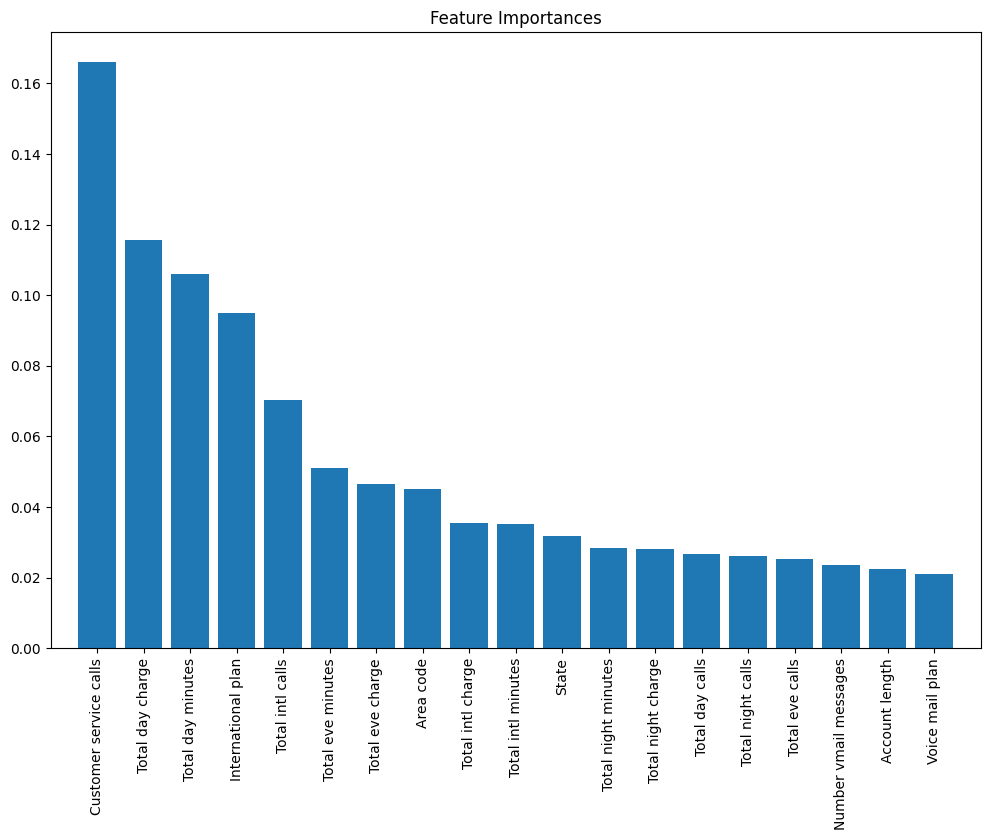

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Xác định tầm quan trọng của các đặc trưng
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# In ra tầm quan trọng của các đặc trưng
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

# Định nghĩa các siêu tham số cần điều chỉnh
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Sử dụng GridSearchCV để tìm kiếm các siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Dự đoán và đánh giá mô hình
y_pred_best = best_rf.predict(X_test)
y_pred_prob_best = best_rf.predict_proba(X_test)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
auc_roc_best = roc_auc_score(y_test, y_pred_prob_best)

print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)
print("AUC-ROC:", auc_roc_best)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9580209895052474
Precision: 0.958904109589041
Recall: 0.7368421052631579
F1 Score: 0.8333333333333334
AUC-ROC: 0.9169764446080235
Confusion Matrix:
 [[569   3]
 [ 25  70]]
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.98       572
        True       0.96      0.74      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.87      0.90       667
weighted avg       0.96      0.96      0.96       667

